In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data_train = pd.read_csv('train.csv')

In [3]:
def plot_figure(x, y, x_label=None, y_label=None, legend=None, figure_type=None, save_path=None, title=None, dpi=200, grid=False):
    """
    :param figure_type: 'pi', 'scatter', 'hist'
    :param save_path: the path to save the figure
    :return:
    """
    fig = plt.figure(dpi=dpi)
    if legend != None:
        if figure_type == None:
            if len(y.shape) > 1:
                for i in range(len(y)):
                    plt.plot(x, y[i], legend[i])
            else:
                plt.plot(x, y, legend)
        elif figure_type == 'bar':
            if len(y.shape) > 1:
                for i in range(len(y)):
                    plt.bar(x, y[i], legend[i], stack=True)
            else:
                plt.bar(x, y, legend)
        elif figure_type == 'scatter':
            if len(y.shape) > 1:
                for i in range(len(y)):
                    plt.scatter(x, y[i], legend[i])
            else:
                plt.scatter(x, y, legend)
        elif figure_type == 'pie':
            if len(y.shape) > 1:
                raise ValueError("the shape of y must be one dimension")
            else:
                plt.pie(y, explode=[0 for i in range(len(y))], labels=legend, autopct="%1.1f%%")
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.legend()
    else:
        if figure_type == None:
            if len(y.shape) > 1:
                for i in range(len(y)):
                    plt.plot(x, y[i])
            else:
                plt.plot(x, y)
        elif figure_type == 'bar':
            if len(y.shape) > 1:
                for i in range(len(y)):
                    plt.plot(x, y[i], stack=True)
            else:
                plt.bar(x, y)
        elif figure_type == 'scatter':
            if len(y.shape) > 1:
                for i in range(len(y)):
                    plt.scatter(x, y[i])
            else:
                plt.scatter(x, y)
        plt.xlabel(x_label)
        plt.ylabel(y_label)
    if save_path != None:
        plt.savefig(save_path)
    if title != None:
        plt.title(title)
    if grid:
        plt.grid(True)
    plt.show()

In [4]:
Survived_m = data_train.Survived[data_train.Sex == 'male'].value_counts()
Survived_f = data_train.Survived[data_train.Sex == 'female'].value_counts()


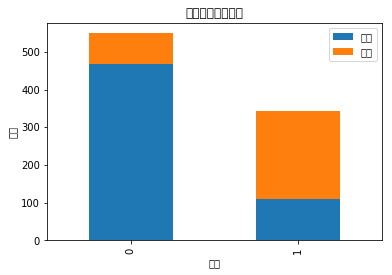

In [30]:
Survived_m = data_train.Survived[data_train.Sex == 'male'].value_counts()
Survived_f = data_train.Survived[data_train.Sex == 'female'].value_counts()
df=pd.DataFrame({u'男性':Survived_m, u'女性':Survived_f})
df.plot(kind='bar', stacked=True)
plt.title(u"按性别看获救情况")
plt.xlabel(u"性别") 
plt.ylabel(u"人数")
plt.show()


In [14]:
data_train.values == data_train.values

array([[ True,  True,  True, ...,  True, False,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True, False,  True],
       ...,
       [ True,  True,  True, ...,  True, False,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True, False,  True]])

In [17]:
values = data_train.Pclass

In [23]:
import sklearn.preprocessing as preprocessing
scaler = preprocessing.StandardScaler()
dummies_Cabin = pd.get_dummies(data_train['Cabin'], prefix= 'Cabin')

dummies_Embarked = pd.get_dummies(data_train['Embarked'], prefix= 'Embarked')

dummies_Sex = pd.get_dummies(data_train['Sex'], prefix= 'Sex')

dummies_Pclass = pd.get_dummies(data_train['Pclass'], prefix= 'Pclass')

df = pd.concat([data_train, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)


In [30]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.tree import DecisionTreeRegressor

print(__doc__)

# construct the dataset
rnd = np.random.RandomState(42)
X = rnd.uniform(-3, 3, size=100)
y = np.sin(X) + rnd.normal(size=len(X)) / 3
X = X.reshape(-1, 1)

# transform the dataset with KBinsDiscretizer
enc = KBinsDiscretizer(n_bins=10, encode='onehot')
X_binned = enc.fit_transform(X)

Automatically created module for IPython interactive environment


Text(0.5, 1.0, 'Result before discretization')

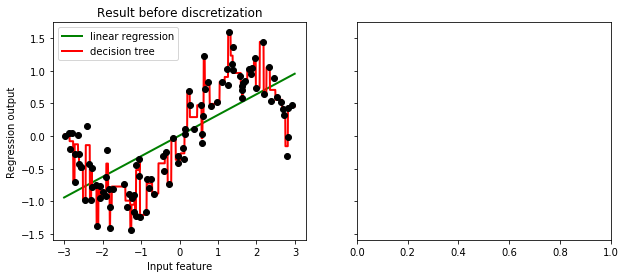

In [31]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(10, 4))
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
reg = LinearRegression().fit(X, y)
ax1.plot(line, reg.predict(line), linewidth=2, color='green',
         label="linear regression")
reg = DecisionTreeRegressor(min_samples_split=3, random_state=0).fit(X, y)
ax1.plot(line, reg.predict(line), linewidth=2, color='red',
         label="decision tree")
ax1.plot(X[:, 0], y, 'o', c='k')
ax1.legend(loc="best")
ax1.set_ylabel("Regression output")
ax1.set_xlabel("Input feature")
ax1.set_title("Result before discretization")


In [35]:
X_binned.todense().shape

(100, 10)